In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import my_functions as my
%config InlineBackend.figure_format = 'retina'

# Polynomial values

In [5]:
data = np.loadtxt('zipcombo.dat')

y = data[:, 0]
X = data[:, 1:]
X_train, X_test, y_train, y_test = my.train_test_split(X, y, test_size = 0.2, random_state = 2020)

In [6]:
train_losses = my.load_obj('train_losses_poly_20')
test_losses = my.load_obj('test_losses_poly_20')

In [7]:
100 - (test_losses.mean(axis = 1) * 100)

array([9.7471759 , 4.26035503, 3.40236686, 3.0500269 , 2.99623453,
       3.01775148, 3.02313072])

# Confusion matrix

In [8]:
confusions = np.load('polynomial_confusions.npy')
train_losses = np.load('train_losses_cross_poly.npy')
val_losses = np.load('val_losses_cross_poly.npy')
best_degrees = np.load('best_degrees_poly.npy')
test_accuracies = np.load('test_accuracies_cross_poly.npy')
wrong_images = my.load_obj('wrong_images_poly')

In [9]:
std_confusion = np.stack(confusions, axis = 2).std(2)


In [10]:
mean_confusion = np.stack(confusions, axis = 2).mean(2)
mean_confusion = mean_confusion / (np.sum(mean_confusion)) * 100
print(np.sum(mean_confusion))

100.0


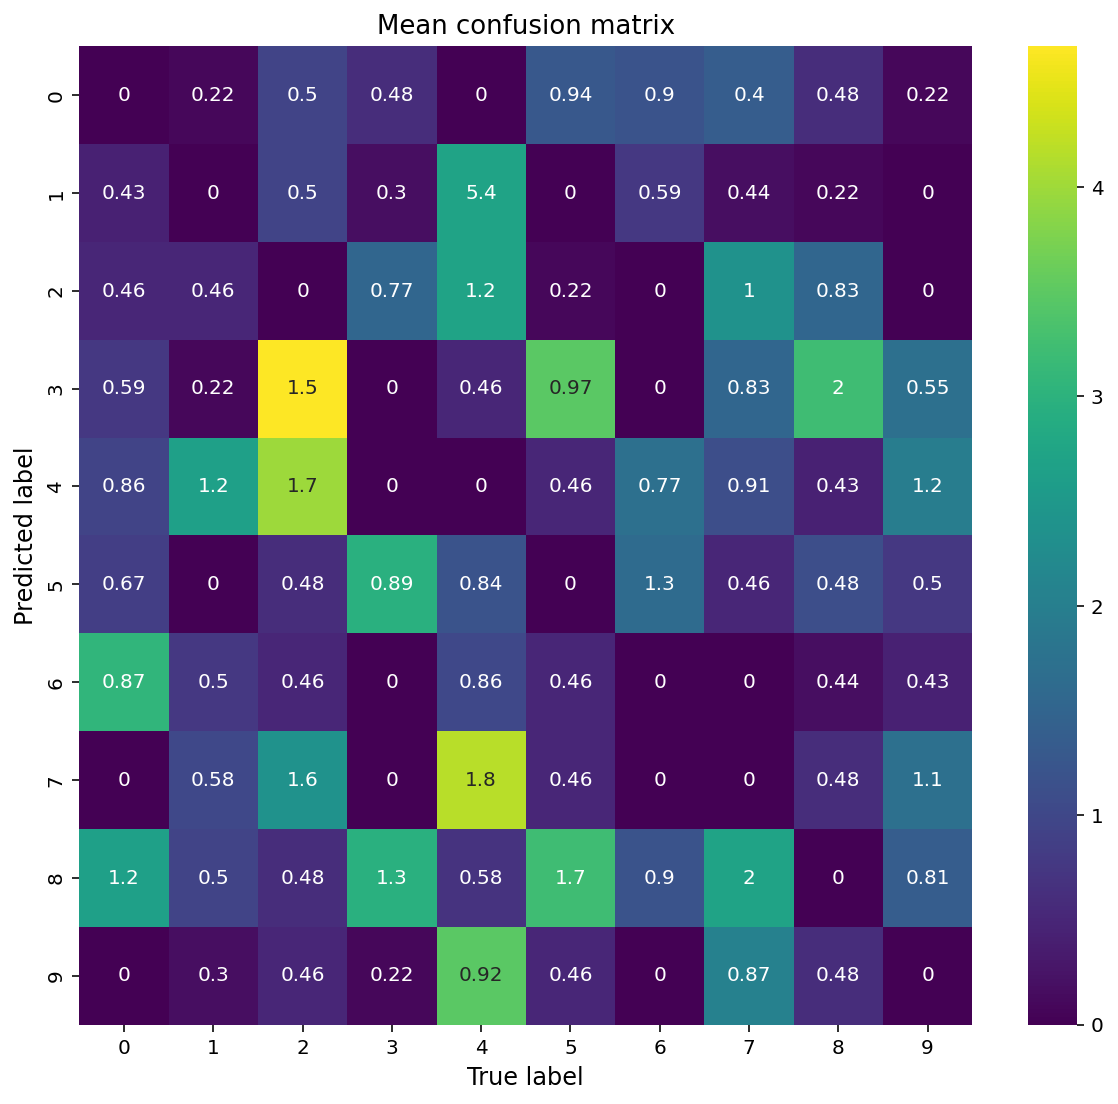

In [11]:
import seaborn as sns
fig, ax = plt.subplots(figsize = (10, 9))
ax = sns.heatmap(mean_confusion, annot = np.around(std_confusion, 2), cmap = 'viridis')
ax.set_title('Mean confusion matrix', fontsize = 13)
ax.set_xlabel('True label', fontsize = 12)
ax.set_ylabel('Predicted label', fontsize = 12);

# Wrong images plot

In [12]:
wrong_array = np.stack(wrong_images, axis = 0) # create array of images gotten wrong - it will include multiple copies of some

temp_array = [tuple(row) for row in wrong_array]
uniques = np.unique(temp_array, axis = 0, return_counts = True) # Get just unique images with counts of how many times they appear
unique_array = np.array(uniques[0]) # Extract only the images
counts = uniques[1] # Extract only the counts

images_with_counts = np.concatenate((counts[:,None], unique_array), axis = 1) # Concatenate them together
sorted_counts = images_with_counts[np.argsort(images_with_counts[:, 0], )]
sorted_counts = np.copy(sorted_counts[::-1]) # Sort by counts and order descendingly

difficult_images = sorted_counts[:5,1:] # Get only the five we care about

In [13]:
sorted_counts[:5, :]

array([[14.   , -1.   , -1.   , ..., -1.   , -1.   , -1.   ],
       [12.   , -1.   , -1.   , ..., -1.   , -1.   , -1.   ],
       [11.   , -1.   , -1.   , ...,  0.135,  0.135, -0.709],
       [11.   , -1.   , -1.   , ..., -1.   , -1.   , -1.   ],
       [11.   , -1.   , -1.   , ..., -1.   , -1.   , -1.   ]])

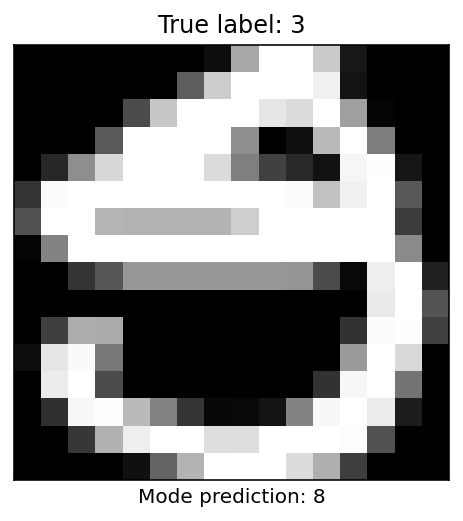

In [14]:
# plot
plt.tick_params(axis = 'both',
    which='both', 
    bottom=False,
    left=False,
    labelleft=False,
    top=False,         
    labelbottom=False)
plt.xlabel('Mode prediction: 8')
plt.imshow(difficult_images[4].reshape(16,16), cmap = 'gray')
plt.title('True label: 3');


In [15]:
# To get true labels:
y[np.where((X == difficult_images[4]).all(axis=1))]


array([3.])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


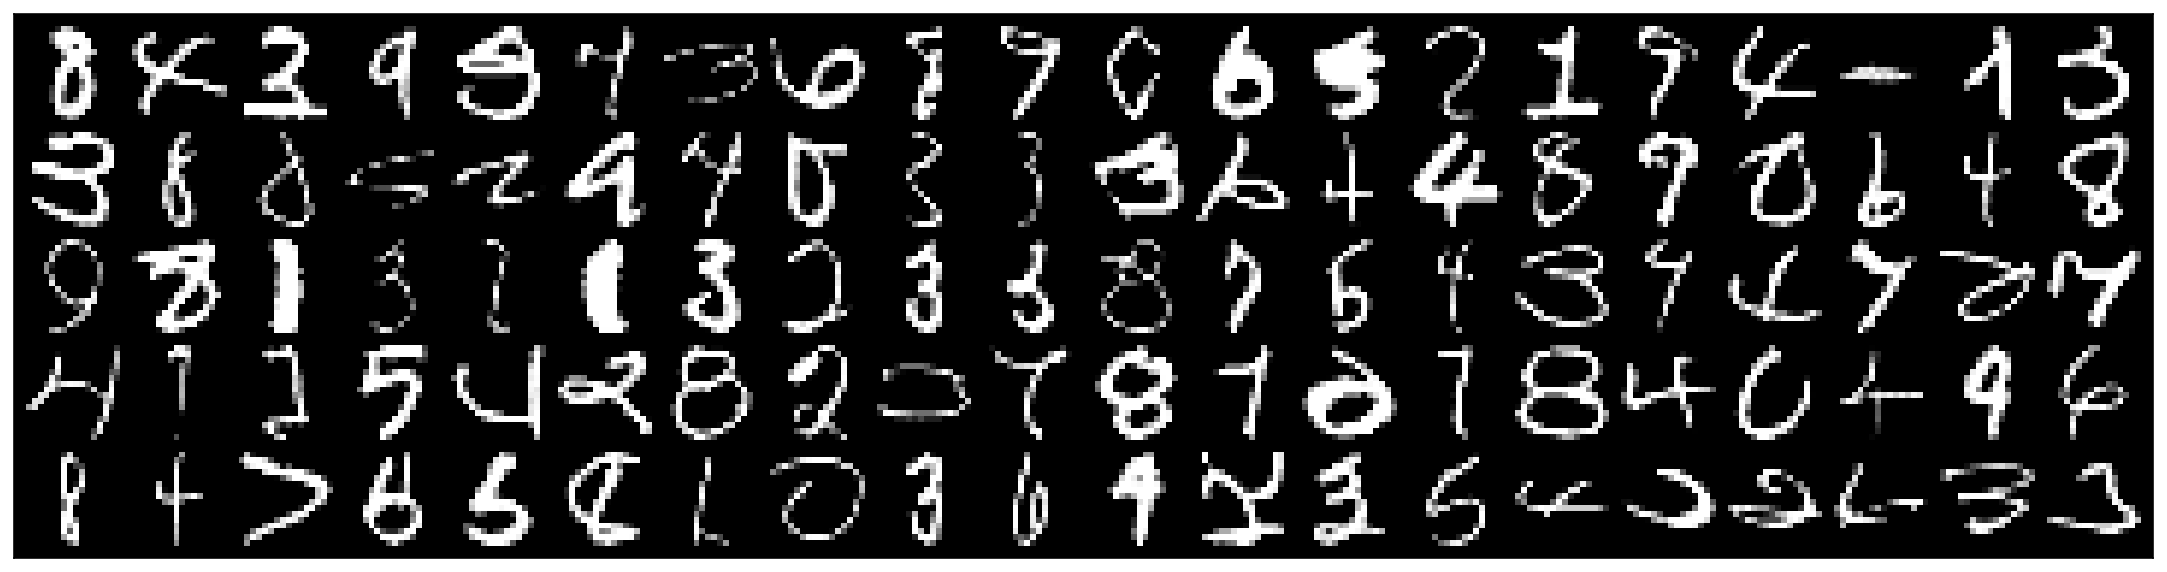

In [16]:
import torch

from torchvision.utils import make_grid

plotting = torch.Tensor(sorted_counts[:101,1:].reshape(-1,1,16,16))

plt.figure(figsize = (20,5))
plt.tick_params(axis = 'both',
    which='both', 
    bottom=False,
    left=False,
    labelleft=False,
    top=False,         
    labelbottom=False)
plt.imshow(make_grid(plotting[:100], nrow = 20).permute(1,2,0));

# Gaussian Kernel values

In [17]:
train_losses_gauss = my.load_obj('train_losses_gauss_20')
test_losses_gauss = my.load_obj('test_losses_gauss_20')

In [25]:
100 - (test_losses_gauss.mean(1) * 100)

array([3.04733728, 3.18719742, 3.29478214, 3.3781603 , 3.76008607,
       3.80311996, 3.90532544])

In [24]:
test_losses_gauss.std(1) * 100

array([0.35367199, 0.366371  , 0.33197994, 0.51048923, 0.51114067,
       0.47297528, 0.45211192])

In [26]:
train_losses = np.load('train_losses_cross_gauss.npy')
val_losses = np.load('val_losses_cross_gauss.npy')
best_gammas = np.load('best_gammas_gauss.npy')
test_accuracies = np.load('test_accuracies_cross_gauss.npy')

In [30]:
100 -(test_accuracies.mean() * 100)

3.211403980634728

In [31]:
test_accuracies.std() * 100

0.17188322010403945

# 1v1 implementation data

In [32]:
train_losses_1v1 = my.load_obj('train_accuracies_poly_1v1')
test_losses_1v1 = my.load_obj('test_accuracies_poly_1v1')

In [36]:
100 - (test_losses_1v1.mean(1) * 100)

array([7.30500269, 3.81925767, 3.5126412 , 3.37009145, 3.27057558,
       3.35395374, 3.50457235])

In [37]:
(test_losses_1v1.std(1) * 100)

array([1.00802924, 0.43335415, 0.42427819, 0.39502607, 0.49815328,
       0.26803228, 0.35244261])

In [39]:
best_degrees = np.load('best_degrees_1v1.npy')
test_accuracies = np.load('test_accuracies_cross_1v1.npy')

In [41]:
best_degrees.std()

1.0198039027185568

In [44]:
100 - (test_accuracies.mean() * 100)

3.2840236686390654

In [45]:
(test_accuracies.std() * 100)

0.31480023464484086